In [2]:

# ==================== IMPORTS ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ==================== DATA LOADING ====================
# Load the dataset
df = pd.read_csv('customer_segmentation.csv')

# Basic data exploration
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [4]:
df.shape  # (2240, 29)


(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# ==================== DATA CLEANING ====================

In [9]:
# Check for missing values
df.isna().sum().sum()  # 24 NA values

0

In [13]:
df.dropna(inplace=True)

In [15]:
df.isna().sum().sum() 

0

In [16]:
# Basic statistics
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [17]:
# Check categorical columns
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [18]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [19]:
# ==================== FEATURE ENGINEERING ====================

In [20]:
# Convert date column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [22]:
# Calculate age
df['Age'] = 2025 - df['Year_Birth']

In [23]:
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2216, dtype: int64

In [24]:
# Calculate total children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [25]:
df['Total_Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_Children, Length: 2216, dtype: int64

In [26]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [27]:
# Calculate total spending
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

In [28]:
df['Total_Spending'] = df[spending_columns].sum(axis=1)

In [29]:
df['Total_Spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spending, Length: 2216, dtype: int64

In [30]:
# Calculate customer tenure (days since enrollment)
df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days

In [31]:
df['Customer_Since']

0       4737
1       4187
2       4386
3       4213
4       4235
        ... 
2235    4455
2236    4093
2237    4229
2238    4230
2239    4696
Name: Customer_Since, Length: 2216, dtype: int64

In [32]:
# ==================== EXPLORATORY DATA ANALYSIS ====================

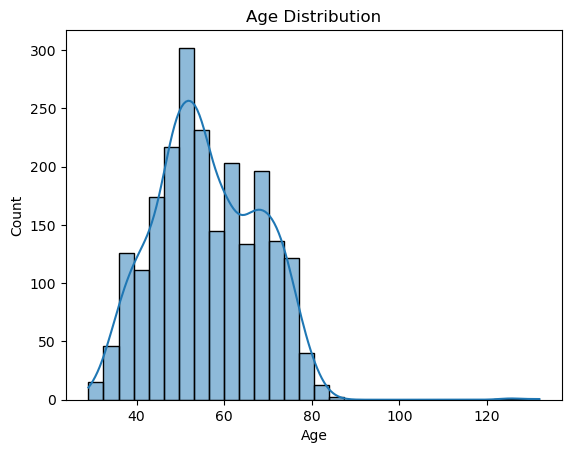

In [33]:
# Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

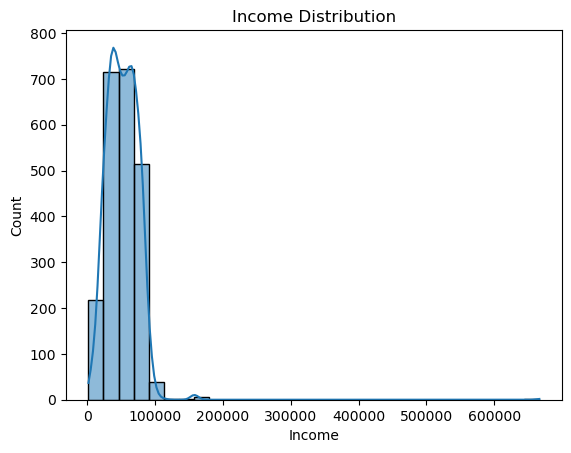

In [34]:
# Income distribution
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.show()

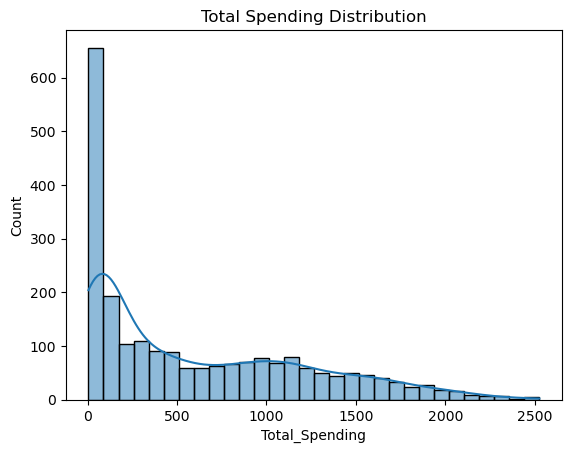

In [35]:
# Total spending distribution
sns.histplot(df['Total_Spending'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.show()

In [36]:
#Categorical data analysis

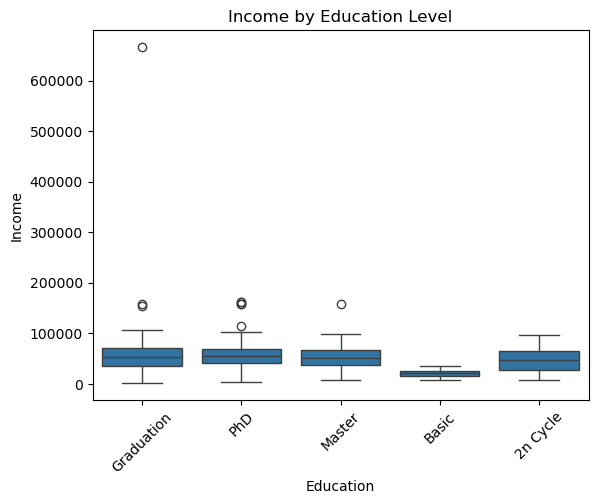

In [37]:
# Income by education level
sns.boxplot(x='Education', y='Income', data=df)
plt.xticks(rotation=45)
plt.title('Income by Education Level')
plt.show()

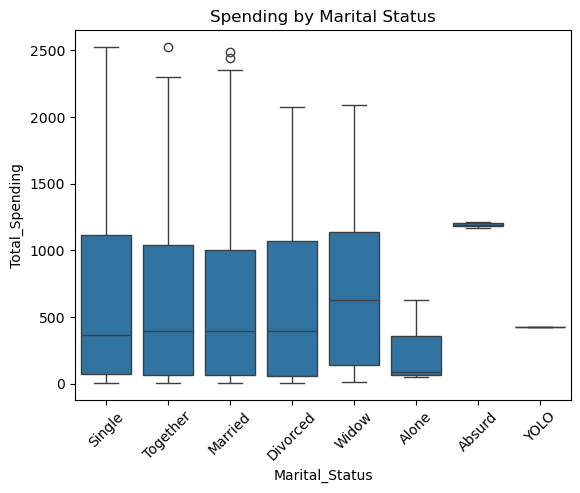

In [38]:
# Spending by marital status
sns.boxplot(x='Marital_Status', y='Total_Spending', data=df)
plt.xticks(rotation=45)
plt.title('Spending by Marital Status')
plt.show()

In [39]:
# ==================== CORRELATION ANALYSIS ====================

In [58]:
# Select columns for correlation
correlation_cols = df[['Income', 'Age', 'Recency' , 'Total_Spending', 'NumWebPurchases', 'NumStorePurchases']].corr()

In [59]:
correlation_cols

,Income,Age,Recency,Total_Spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_Spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


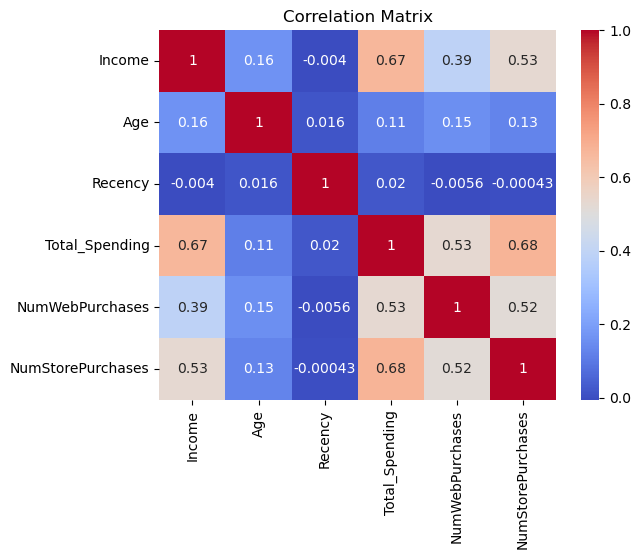

In [61]:
# Correlation heatmap
sns.heatmap(correlation_cols, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Pivot table for income by education and marital status
pivot_income = df.pivot_table(values='Income', index='Education', columns='Marital_Status', aggfunc='mean')

In [63]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


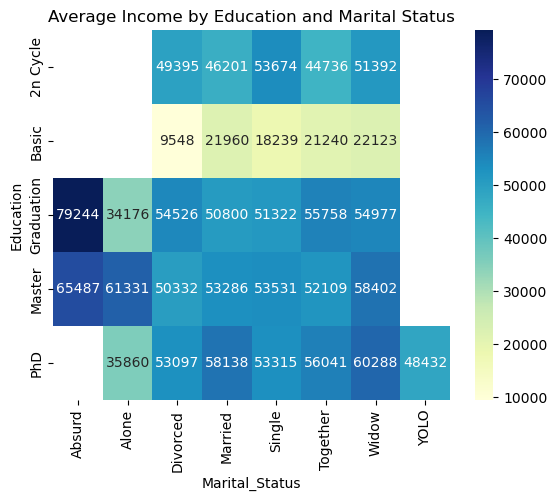

In [64]:
# Heatmap of pivot table
sns.heatmap(pivot_income, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Income by Education and Marital Status')
plt.show()

In [65]:
# Average spending by education
group1 = df.groupby('Education')['Total_Spending'].mean().sort_values(ascending=False)

In [66]:
group1 

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_Spending, dtype: float64

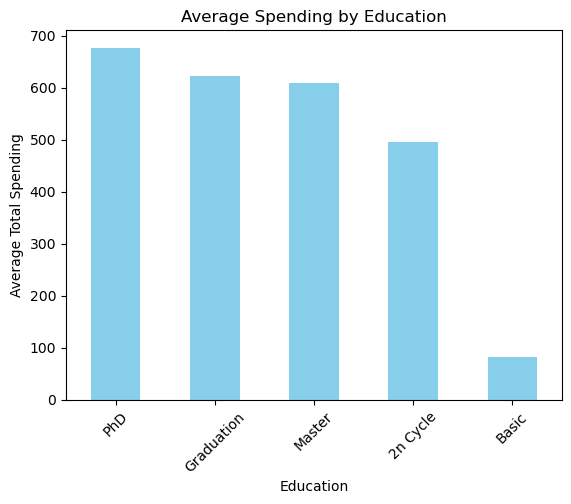

In [67]:
group1.plot(kind='bar', color='skyblue')
plt.title('Average Spending by Education')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.show()

In [68]:
# ================  Campaign acceptance analysis  ===================

In [69]:
# Create combined accepted any campaign indicator
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 
                'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Accepted_Any'] = df[campaign_cols].sum(axis=1)

In [70]:
df['Accepted_Any']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: Accepted_Any, Length: 2216, dtype: int64

In [71]:
df['Accepted_Any'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [72]:
# Convert to binary (1 if accepted any, 0 if none)
df['Accepted_Any'] = df['Accepted_Any'].apply(lambda x: 1 if x > 0 else 0)

In [73]:
df['Accepted_Any'].unique()

array([1, 0], dtype=int64)

In [74]:
# Campaign acceptance rate by marital status
group2 = df.groupby('Marital_Status')['Accepted_Any'].mean().sort_values(ascending=False)

In [75]:
group2 

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: Accepted_Any, dtype: float64

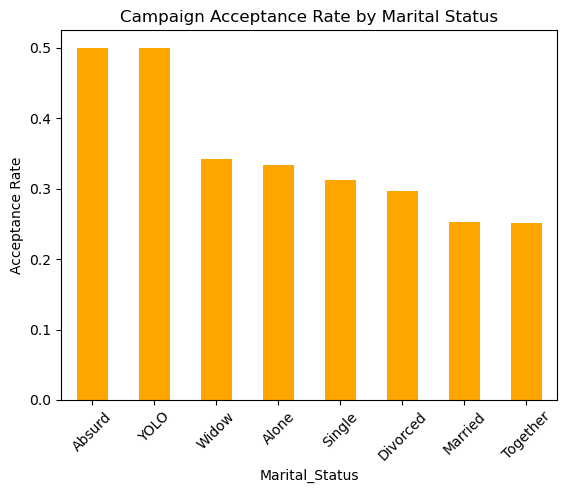

In [76]:
group2.plot(kind='bar', color='orange')
plt.title('Campaign Acceptance Rate by Marital Status')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Average income by age groups
bins = [18, 30, 40, 50, 60, 70, 90]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [78]:
df['Age_Group']

0       60-69
1         70+
2       50-59
3       40-49
4       40-49
        ...  
2235    50-59
2236      70+
2237    40-49
2238    60-69
2239      70+
Name: Age_Group, Length: 2216, dtype: category
Categories (6, object): ['18-29' < '30-39' < '40-49' < '50-59' < '60-69' < '70+']

In [79]:
group3 = df.groupby('Age_Group')['Income'].mean()

C:\Users\yoges\AppData\Local\Temp\ipykernel_28388\3091144797.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby('Age_Group')['Income'].mean()


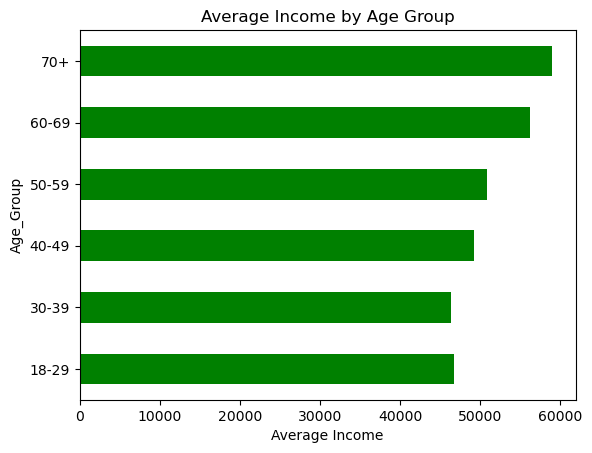

In [80]:
group3.plot(kind='barh', color='green')
plt.title('Average Income by Age Group')
plt.xlabel('Average Income')
plt.show()

In [81]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,Accepted_Any,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,0,1617,4737,1,60-69
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,2,27,4187,0,70+
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,0,776,4386,0,50-59
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,1,53,4213,0,40-49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,1,422,4235,0,40-49


In [84]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_Spending', 'Customer_Since',
       'Accepted_Any', 'Age_Group'],
      dtype='object')

In [85]:
# Selecting key features for clustering:
# These include demographic (Age, Income), behavioral (Web/Store Purchases, Web Visits),
# and recency metrics to capture customer engagement and spending patterns.



In [86]:
features = ['Age', 'Income', 'Total_Spending', 'NumWebPurchases', 
           'NumStorePurchases', 'NumWebVisitsMonth', 'Recency']

In [87]:
X = df[features].copy()

In [88]:
X

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [89]:
# ==================== DATA PREPROCESSING ====================

In [90]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812, ..., -0.55414289,
         0.69323197,  0.31053212],
       [ 1.23680074, -0.23455948, -0.96235832, ..., -1.16951781,
        -0.1315745 , -0.38050944],
       [ 0.31882209,  0.76947764,  0.28024985, ...,  1.29198186,
        -0.54397773, -0.79513438],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, ...,  2.21504423,
         0.28082874,  1.4507507 ],
       [ 1.06989553,  0.67538765,  0.39140438, ...,  1.29198186,
        -0.95638097, -1.41707178],
       [ 1.23680074,  0.02470453, -0.7218    , ..., -0.55414289,
         0.69323197, -0.31140528]])

In [92]:
# ==================== K-MEANS CLUSTERING ====================

In [93]:
from sklearn.cluster import KMeans

In [95]:
# Elbow method to find optimal number of clusters
inertia_list = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\Users\yoges\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [96]:
import warnings

warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")


In [101]:
# Elbow method to find optimal number of clusters
inertia_list = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)

In [102]:
inertia_list

[10218.631348031095,
 9359.975525676487,
 8239.322185111972,
 7710.487082229414,
 7103.60648420844,
 6838.129438537475,
 6415.496660160914,
 5982.746463361855]

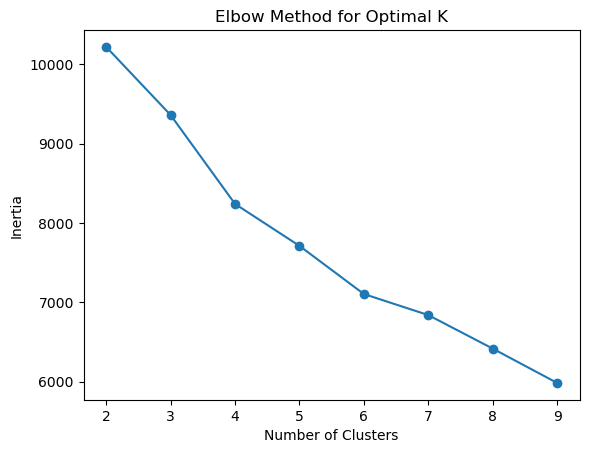

In [103]:
# Plot elbow curve
plt.plot(range(2, 10), inertia_list, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [104]:
# Apply K-means with 6 clusters
kmeans = KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [105]:
df['Cluster']

0       3
1       0
2       3
3       0
4       2
       ..
2235    3
2236    5
2237    1
2238    4
2239    5
Name: Cluster, Length: 2216, dtype: int32

In [106]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_CostContact,Z_Revenue,Response,Age,Total_Children,Total_Spending,Customer_Since,Accepted_Any,Age_Group,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,68,0,1617,4737,1,60-69,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,71,2,27,4187,0,70+,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,60,0,776,4386,0,50-59,3
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,41,1,53,4213,0,40-49,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,44,1,422,4235,0,40-49,2


In [107]:
# ==================== CLUSTER ANALYSIS ====================

In [109]:
# Cluster summary
cluster_summary = df.groupby('Cluster')[features].mean()
cluster_summary

,Age,Income,Total_Spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Cluster,,,,,,,
0,50.948718,31985.682446,81.850099,1.875740,2.984221,6.641026,26.351085
1,46.063694,79041.535032,1320.713376,4.573248,8.563694,2.585987,47.054140
2,55.148438,36446.644531,128.150391,2.359375,3.439453,6.357422,76.085938
3,58.280576,62479.410072,1045.974820,8.316547,8.856115,6.154676,62.863309
4,69.799331,73820.816054,1177.290970,4.404682,8.250836,2.414716,54.311037
5,61.735294,54384.784314,590.434641,5.977124,6.415033,6.274510,25.509804


In [110]:
# Cluster counts
df['Cluster'].value_counts()

Cluster
2    512
0    507
1    314
5    306
4    299
3    278
Name: count, dtype: int64

In [111]:
# ==================== VISUALIZATION WITH PCA ====================

In [118]:
from sklearn.decomposition import PCA

# Apply PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'] ,df['PCA2'] = pca_data[:, 0] , pca_data[:, 1]

In [119]:
df['PCA1']

0       1.107519
1      -1.336734
2       1.882277
3      -1.784359
4       0.020363
          ...   
2235    1.248177
2236    0.508708
2237    1.153597
2238    1.887680
2239   -0.841821
Name: PCA1, Length: 2216, dtype: float64

In [120]:
df['PCA2']

0      -0.211760
1       0.269839
2      -1.014161
3      -0.704928
4       1.235265
          ...   
2235   -0.535766
2236   -0.141328
2237    1.150570
2238   -1.160737
2239   -0.159636
Name: PCA2, Length: 2216, dtype: float64

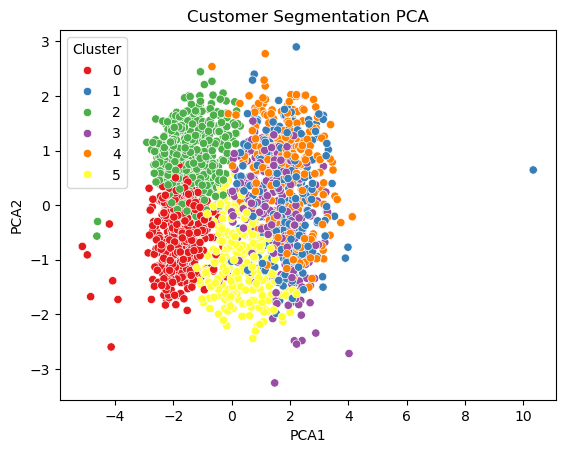

In [121]:
# Scatter plot of clusters
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", data=df, palette="Set1")
plt.title('Customer Segmentation PCA')
plt.show()

In [122]:
# ==================== MODEL EXPORT ====================
import joblib

# Save the model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']